In [1]:
import sys
import os

# Add project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
from forcateri.model.dartsmodels.dartstcnmodel import DartsTCNModel
from forcateri.baltbestapi.baltbestaggregatedapidata import BaltBestAggregatedAPIData
import pandas as pd
from forcateri.data.dataprovider import DataProvider, SeriesRole
from darts.models import TCNModel
from darts.utils.likelihood_models import QuantileRegression
from forcateri.data.timeseries import TimeSeries

In [3]:
%load_ext autoreload
%autoreload 2 

In [4]:
# baltbest = BaltBestAggregatedAPIData(
#     name='test', 
#     url="baltbest_url", 
#     local_copy="/home/user/DFKI/forcateri/_data/showcase_data.csv",
#     target = 'q_hca',
#     group_col = 'room_id',
#     time_col = 'datetime',
#     known = 'temperature_outdoor_avg',
#     observed = ['temperature_1_max', 'temperature_2_max','temperature_room_avg'],)
baltbest = BaltBestAggregatedAPIData()

In [5]:
import logging

# Get the logger you used in your TimeSeries class
logger = logging.getLogger("forcateri.data.timeseries")
logger.setLevel(logging.INFO)  # or logging.DEBUG for more verbosity

# Create handler if it doesn't exist
if not logger.handlers:
    handler = logging.StreamHandler()
    handler.setLevel(logging.INFO)
    formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
    handler.setFormatter(formatter)
    logger.addHandler(handler)

# Optional: prevent propagation to avoid double logs
logger.propagate = False


In [6]:

#baltbest.get_data()


In [7]:
roles = {
    'q_hca': SeriesRole.TARGET, 
    'temperature_outdoor_avg':SeriesRole.KNOWN, 
    'temperature_1_max':SeriesRole.OBSERVED, 
    'temperature_2_max':SeriesRole.OBSERVED,
    'temperature_room_avg':SeriesRole.OBSERVED,}
#['temperature_1_max', 'temperature_2_max','temperature_room_avg']
# roles = {
#     'delta': SeriesRole.TARGET, 
#     'outside_temp':SeriesRole.KNOWN, 
#     'max_temperature_1':SeriesRole.OBSERVED, 
#     'max_temperature_1':SeriesRole.OBSERVED,
#     'room_temperature':SeriesRole.OBSERVED,}

In [8]:
start = pd.Timestamp(2021, 1, 3, 4,tz=0)
end = pd.Timestamp(2021, 1, 8, 4,tz=0)
dataprovider = DataProvider(data_sources=[baltbest], roles=roles)

2025-07-03 15:44:10,844 - INFO - Checking DataFrame for deterministic representation. Feature levels must be unique.
2025-07-03 15:44:10,845 - INFO - TimeSeries initialized from internal-format DataFrame.
2025-07-03 15:44:10,858 - INFO - Checking DataFrame for deterministic representation. Feature levels must be unique.
2025-07-03 15:44:10,859 - INFO - TimeSeries initialized from internal-format DataFrame.
2025-07-03 15:44:10,872 - INFO - Checking DataFrame for deterministic representation. Feature levels must be unique.
2025-07-03 15:44:10,873 - INFO - TimeSeries initialized from internal-format DataFrame.
2025-07-03 15:44:10,885 - INFO - Checking DataFrame for deterministic representation. Feature levels must be unique.
2025-07-03 15:44:10,885 - INFO - TimeSeries initialized from internal-format DataFrame.
2025-07-03 15:44:10,897 - INFO - Checking DataFrame for deterministic representation. Feature levels must be unique.
2025-07-03 15:44:10,898 - INFO - TimeSeries initialized from in

In [9]:
train = dataprovider.get_train_set()
val = dataprovider.get_val_set()
test = dataprovider.get_test_set()

2025-07-03 15:44:12,788 - INFO - Checking DataFrame for deterministic representation. Feature levels must be unique.
2025-07-03 15:44:12,789 - INFO - TimeSeries initialized from internal-format DataFrame.
2025-07-03 15:44:12,794 - INFO - Checking DataFrame for deterministic representation. Feature levels must be unique.
2025-07-03 15:44:12,795 - INFO - TimeSeries initialized from internal-format DataFrame.
2025-07-03 15:44:12,800 - INFO - Checking DataFrame for deterministic representation. Feature levels must be unique.
2025-07-03 15:44:12,802 - INFO - TimeSeries initialized from internal-format DataFrame.
2025-07-03 15:44:12,807 - INFO - Checking DataFrame for deterministic representation. Feature levels must be unique.
2025-07-03 15:44:12,809 - INFO - TimeSeries initialized from internal-format DataFrame.
2025-07-03 15:44:12,814 - INFO - Checking DataFrame for deterministic representation. Feature levels must be unique.
2025-07-03 15:44:12,815 - INFO - TimeSeries initialized from in

In [42]:
train[0].target.data

feature                    q_hca
representation             value
offset time_stamp               
0 days 2019-06-01 00:00:00   0.0
       2019-06-01 01:00:00   0.0
       2019-06-01 02:00:00   0.0
       2019-06-01 03:00:00   0.0
       2019-06-01 04:00:00   0.0
...                          ...
       2020-01-14 10:00:00   0.0
       2020-01-14 11:00:00   0.0
       2020-01-14 12:00:00   0.0
       2020-01-14 13:00:00   0.0
       2020-01-14 14:00:00   0.0

[5463 rows x 1 columns]

In [11]:
# import os
# #os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# quantiles = [0.1, 0.5, 0.9]
# dartstcn = DartsTCNModel( quantiles=quantiles)
# dartstcn.fit(train_data = train, val_data=val)

In [12]:
num_forecast_steps = 5
#num_monte_carlo_samples = 50 # A sufficient number of samples to approximate the quantiles
dartstcn = DartsTCNModel.load( "/home/user/DFKI/forcateri/_data/dartstcn.pt")
quantiles = [0.1, 0.5, 0.9] # Define the quantiles you want to predict
dartstcn.quantiles = quantiles
#Here prediction is darts timeseries
prediction = dartstcn.predict(
    data=val, # Pass the series used for prediction context
    predict_likelihood_parameters = True,
    n=num_forecast_steps,
)

/home/user/DFKI/forcateri/forcateri/model/dartsmodels/dartsmodeladapter.py:99: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_reset = df_reset.drop(columns="offset")
/home/user/DFKI/forcateri/forcateri/model/dartsmodels/dartsmodeladapter.py:99: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_reset = df_reset.drop(columns="offset")
/home/user/DFKI/forcateri/forcateri/model/dartsmodels/dartsmodeladapter.py:99: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_reset = df_reset.drop(columns="offset")
/home/user/DFKI/forcateri/forcateri/model/dartsmodels/dartsmodeladapter.py:99: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_reset = df_reset.drop(columns="offset")
/home/user/DFKI/forcateri/forcateri/model/dartsmodels/dartsmodel

Predicting: |          | 0/? [00:00<?, ?it/s]

In [13]:
from IPython.display import display, Markdown
def mprint(s): display(Markdown(s))

In [14]:
prediction

[<TimeSeries (DataArray) (time_stamp: 5, component: 3, sample: 1)> Size: 120B
 array([[[-0.00219926],
         [-0.0043696 ],
         [ 0.02313677]],
 
        [[-0.00227386],
         [-0.00450135],
         [ 0.0230793 ]],
 
        [[-0.00211611],
         [-0.00449478],
         [ 0.0132351 ]],
 
        [[-0.00214441],
         [-0.00453311],
         [ 0.01353856]],
 
        [[-0.00211291],
         [-0.00457238],
         [ 0.01481526]]])
 Coordinates:
   * time_stamp  (time_stamp) datetime64[ns] 40B 2020-08-29T04:00:00 ... 2020-...
   * component   (component) <U11 132B 'q_hca_q0.10' 'q_hca_q0.50' 'q_hca_q0.90'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  None
     hierarchy:          None
     metadata:           None,
 <TimeSeries (DataArray) (time_stamp: 5, component: 3, sample: 1)> Size: 120B
 array([[[-0.00239069],
         [-0.00462667],
         [ 0.03194541]],
 
        [[-0.00247478],
         [-0.00476881],
         [ 0.03236411]],
 

In [15]:
prediction_ts = dartstcn.to_time_series(prediction)

2025-07-03 15:44:21,659 - INFO - TimeSeries initialized from compatible-format DataFrame.
2025-07-03 15:44:21,664 - INFO - TimeSeries initialized from compatible-format DataFrame.
2025-07-03 15:44:21,667 - INFO - TimeSeries initialized from compatible-format DataFrame.
2025-07-03 15:44:21,671 - INFO - TimeSeries initialized from compatible-format DataFrame.
2025-07-03 15:44:21,675 - INFO - TimeSeries initialized from compatible-format DataFrame.
2025-07-03 15:44:21,680 - INFO - TimeSeries initialized from compatible-format DataFrame.
2025-07-03 15:44:21,690 - INFO - TimeSeries initialized from compatible-format DataFrame.
2025-07-03 15:44:21,698 - INFO - TimeSeries initialized from compatible-format DataFrame.
2025-07-03 15:44:21,706 - INFO - TimeSeries initialized from compatible-format DataFrame.
2025-07-03 15:44:21,715 - INFO - TimeSeries initialized from compatible-format DataFrame.
2025-07-03 15:44:21,723 - INFO - TimeSeries initialized from compatible-format DataFrame.
2025-07-03

In [ ]:
dum = prediction_ts[0].data
#Need to fix timestamp and offset

feature                                target                    
representation                            0.1       0.5       0.9
offset          time_stamp                                       
0 days 01:00:00 2020-08-29 03:00:00 -0.002199 -0.004370  0.023137
0 days 02:00:00 2020-08-29 03:00:00 -0.002274 -0.004501  0.023079
0 days 03:00:00 2020-08-29 03:00:00 -0.002116 -0.004495  0.013235
0 days 04:00:00 2020-08-29 03:00:00 -0.002144 -0.004533  0.013539
0 days 05:00:00 2020-08-29 03:00:00 -0.002113 -0.004572  0.014815

In [1]:
import pandas as pd
import numpy as np

# Offsets (timedeltas)
offsets = pd.to_timedelta(['1:00:00', '2:00:00', '3:00:00', '4:00:00', '5:00:00'])

# Multiple timestamps per offset
time_stamps = pd.to_datetime([
    '2020-08-29 03:00:00',
    '2020-08-29 04:00:00',
    '2020-08-29 05:00:00',
])

# Cartesian product for MultiIndex rows
offset_repeated = np.repeat(offsets.values, len(time_stamps))
time_stamp_tiled = np.tile(time_stamps.values, len(offsets))

multi_idx = pd.MultiIndex.from_arrays(
    [offset_repeated, time_stamp_tiled],
    names=['offset', 'time_stamp']
)

N = len(multi_idx)

# Generate base data
base = np.random.normal(loc=0, scale=1, size=N)
q_01 = base - 1.0
q_05 = base
q_09 = base + 1.0

data = np.vstack([q_01, q_05, q_09]).T  # shape (N, 3)

# Define MultiIndex for columns: level 0 = 'feature' name, level 1 = representation
col_idx = pd.MultiIndex.from_product(
    [['q_hca'], [0.1, 0.5, 0.9]],
    names=['feature', 'representation']
)

df_synthetic = pd.DataFrame(data, index=multi_idx, columns=col_idx)

df_synthetic

feature                                 q_hca                    
representation                            0.1       0.5       0.9
offset          time_stamp                                       
0 days 01:00:00 2020-08-29 03:00:00 -1.202052 -0.202052  0.797948
                2020-08-29 04:00:00 -0.406903  0.593097  1.593097
                2020-08-29 05:00:00 -0.796290  0.203710  1.203710
0 days 02:00:00 2020-08-29 03:00:00 -1.180814 -0.180814  0.819186
                2020-08-29 04:00:00 -3.005431 -2.005431 -1.005431
                2020-08-29 05:00:00 -1.372291 -0.372291  0.627709
0 days 03:00:00 2020-08-29 03:00:00 -1.001062 -0.001062  0.998938
                2020-08-29 04:00:00 -1.098714 -0.098714  0.901286
                2020-08-29 05:00:00  0.463931  1.463931  2.463931
0 days 04:00:00 2020-08-29 03:00:00 -0.526449  0.473551  1.473551
                2020-08-29 04:00:00 -0.224699  0.775301  1.775301
                2020-08-29 05:00:00 -1.306447 -0.306447  0.693553
0 days 05:00:00 2020-08-29 03:00:00 -2.423878 -1.423878 -0.423878
                2020-08-29 04:00:00 -2.367410 -1.367410 -0.367410
                2020-08-29 05:00:00 -0.376354  0.623646  1.623646

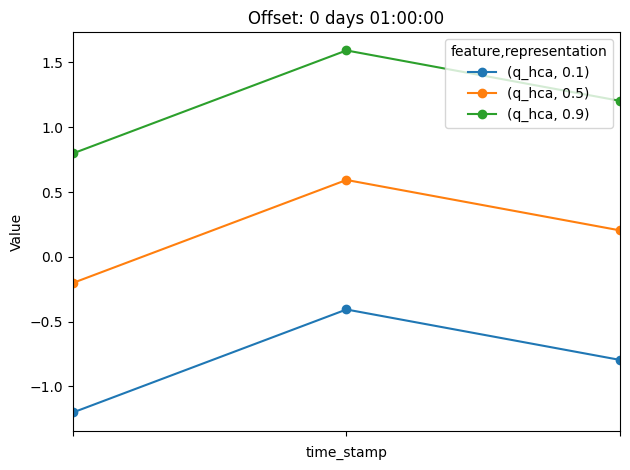

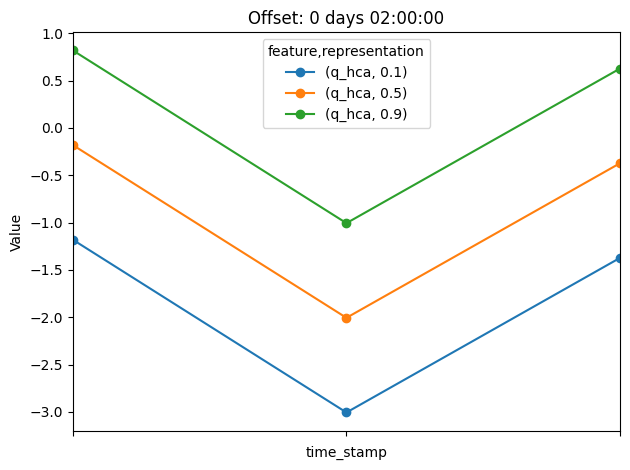

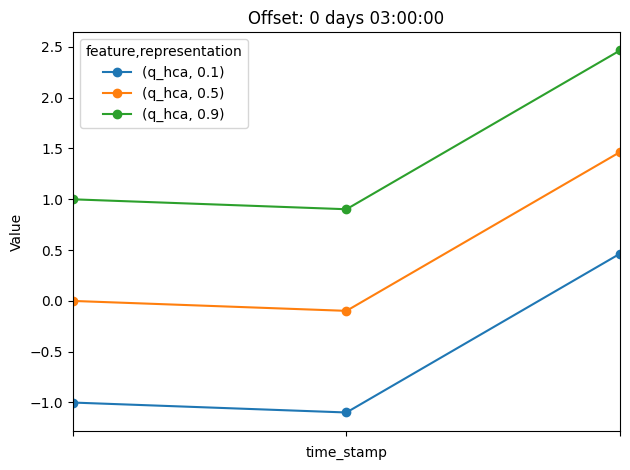

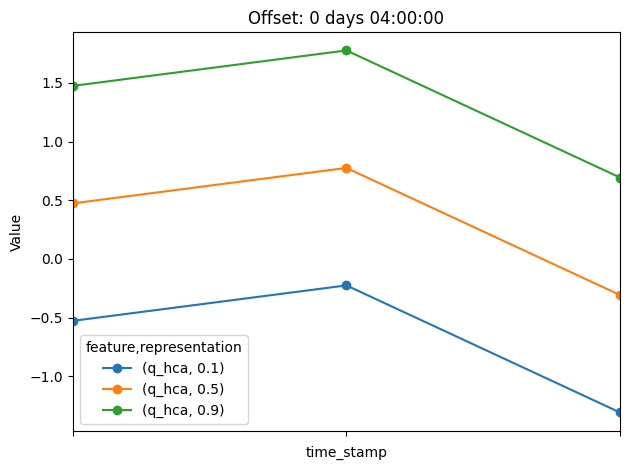

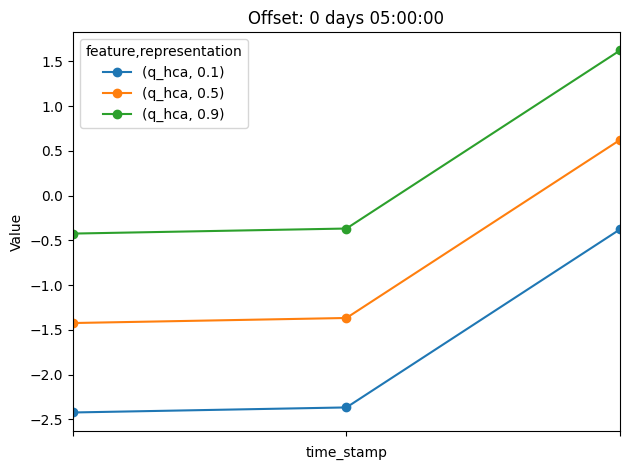

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
for offset_value, group_df in df_synthetic.groupby(level='offset'):
    ax = group_df.droplevel('offset').plot(
        marker='o', 
        title=f'Offset: {offset_value}', 
        xlabel='time_stamp', 
        ylabel='Value'
    )
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

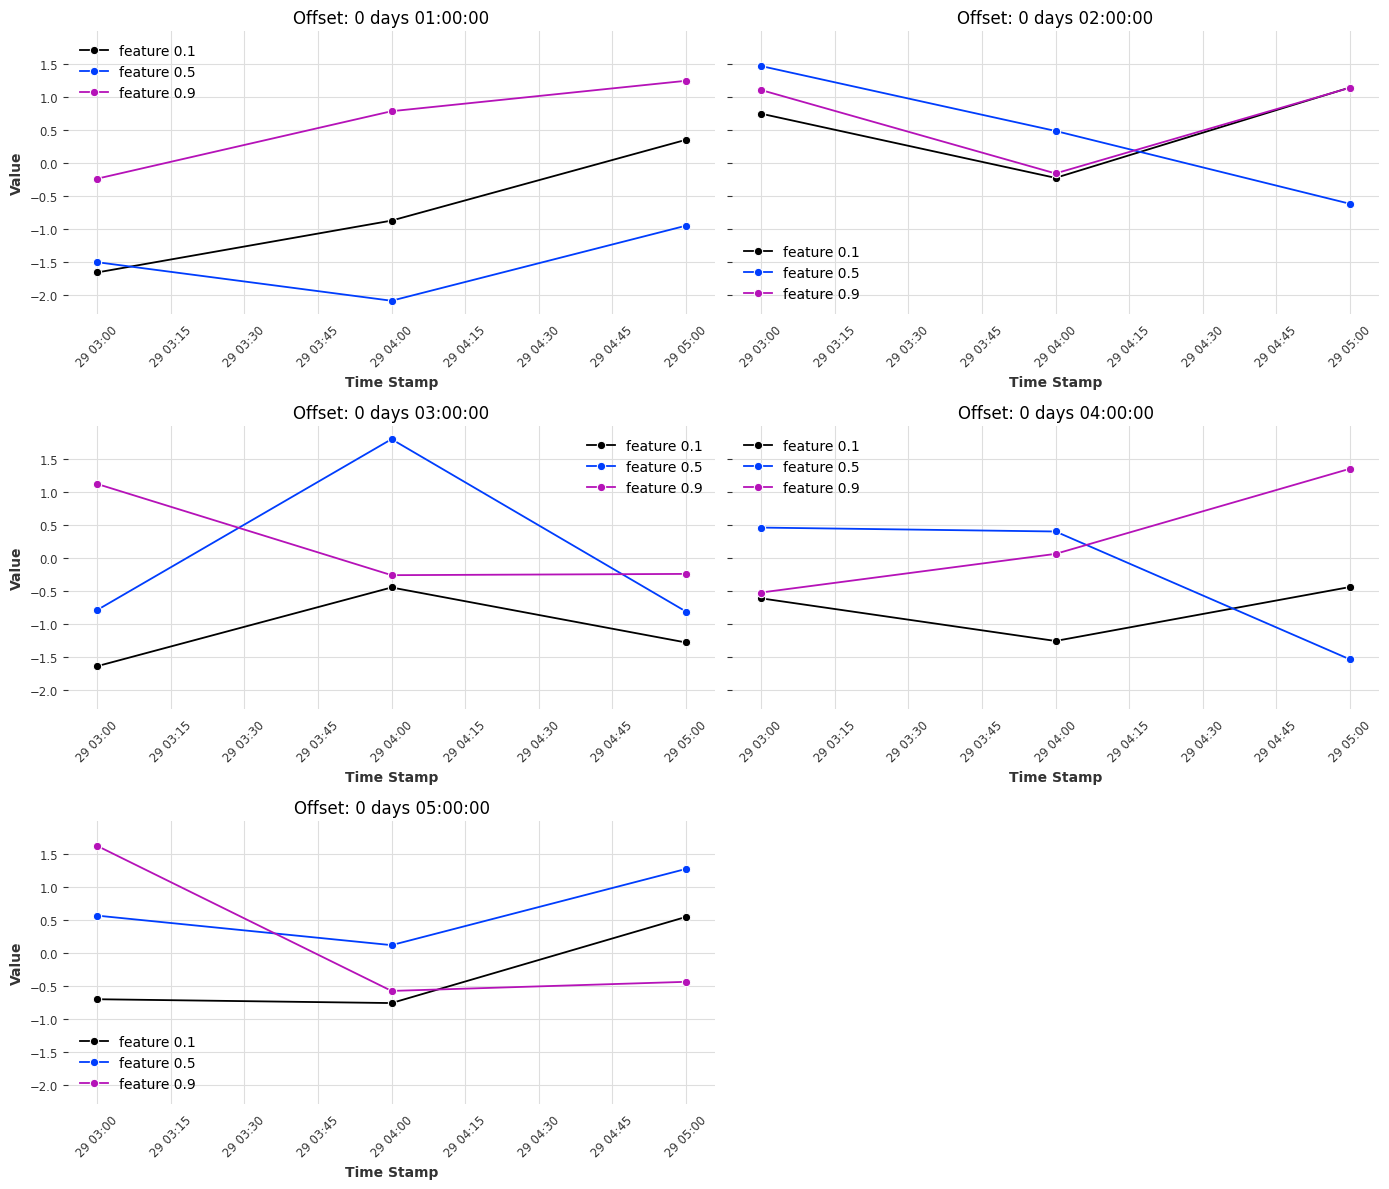

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

df_plot = df_synthetic.reset_index()
n_offsets = len(offsets)

# Setup subplots: 2 columns, adjust rows automatically
ncols = 2
nrows = (n_offsets + 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(14, 4*nrows), sharey=True)
axes = axes.flatten()

for i, offset in enumerate(offsets):
    ax = axes[i]
    df_sub = df_plot[df_plot['offset'] == offset]

    # Plotting feature columns: assuming MultiIndex columns like ('feature', 0.1), ('feature', 0.5), etc.
    # We'll plot each feature (the second level of columns)
    for val in df_synthetic.columns.levels[1]:
        sns.lineplot(
            x='time_stamp', 
            y=('feature', val), 
            data=df_sub, 
            marker='o', 
            label=f'feature {val}',
            ax=ax
        )

    ax.set_title(f'Offset: {offset}')
    ax.set_xlabel('Time Stamp')
    ax.set_ylabel('Value')
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

# Remove unused subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()